In [29]:
import numpy as np 
import random

In [30]:
def genData(numPoints, A, K, variance): 
    x = np.zeros(shape=(numPoints, 2)) 
    y = np.zeros(shape=numPoints)
    for i in range(0, numPoints):
        x[i][0] = 1
        x[i][1] = i
        y[i] = (A * i + K) + random.uniform(0, 1) * variance
    return x, y

In [31]:
x, y = genData(numPoints = 100, A = 2, K = 100, variance = 30)

[]

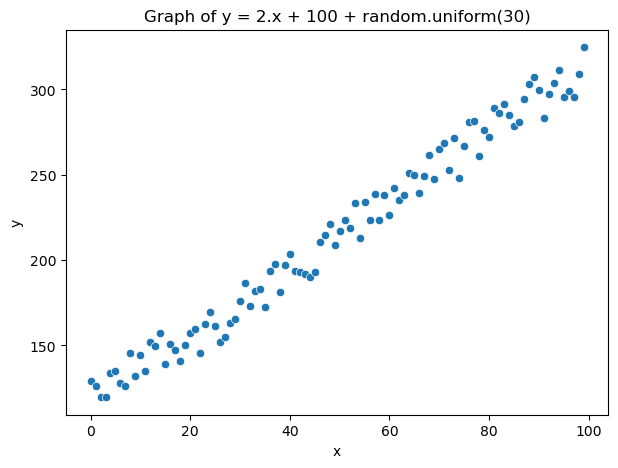

In [32]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 5))
fig = sns.scatterplot(x = x[:,1], y=y)
fig.set(xlabel ="x", ylabel = "y", title ='Graph of y = 2.x + 100 + random.uniform(30)') 
plt.plot()

In [33]:
m, n = np.shape(x) # The length and width of the source dataframe 
print("m (Length)= ", m, "and n (width)=", n)

m (Length)=  100 and n (width)= 2


In [34]:
print(x[0:5])

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]


In [35]:
alpha = 0.0005 
theta = np.ones(n)
print(theta)

[1. 1.]


In [36]:
print(x.T)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
  36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
  54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
  72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
  90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]]


In [37]:
best_guess = np.dot(theta, x.T) 
best_guess

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

[Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y'),
 Text(0.5, 1.0, 'Graph of y = 2.x + 100 + random.uniform(30)')]

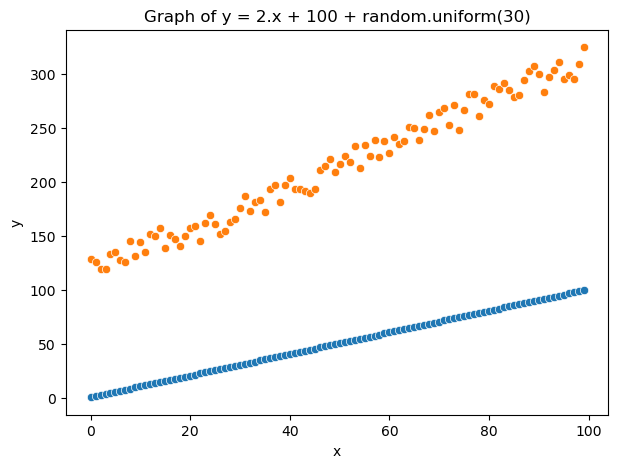

In [38]:
fig = plt.figure(figsize=(7, 5))
fig = sns.scatterplot(x = x[:,1], y=best_guess)
fig = sns.scatterplot(x = x[:,1], y=y)
fig.set(xlabel ="x", ylabel = "y", title ='Graph of y = 2.x + 100 + random.uniform(30)')

In [39]:
loss = best_guess - y 
loss

array([-128.12799842, -124.50421396, -116.83836221, -115.6766738 ,
       -128.88819454, -129.29940492, -121.25426208, -118.03122076,
       -136.78995966, -121.8599393 , -133.3319697 , -122.873282  ,
       -138.86643737, -135.72850096, -142.10164401, -123.07352952,
       -133.61486289, -129.53085256, -121.93795622, -130.05554168,
       -136.14628342, -137.44610059, -122.28943893, -138.35072774,
       -144.69143842, -135.56007071, -125.1824801 , -127.19575796,
       -134.41084297, -135.6992792 , -144.86759997, -154.87543074,
       -139.82750086, -147.9795192 , -147.99363123, -136.36176058,
       -156.84068149, -159.58741807, -142.21422505, -157.00211977,
       -162.84916241, -151.76113429, -150.14384119, -148.14630146,
       -145.1739398 , -147.2744659 , -163.75724931, -166.47826757,
       -172.02942737, -158.92917929, -165.96513457, -171.75822911,
       -165.65826159, -179.62364606, -157.7058752 , -177.95306677,
       -166.7511049 , -180.99815787, -164.49995933, -178.14043

In [40]:
cost = np.sum(loss ** 2) / (2 * m) 
cost

13979.796272175148

In [41]:
gradient = np.ones(n) # Create an array to store the gradient 
gradient[0] = 0
gradient[1] = 0
for i in range(len(x)):
    #gradient of loss function with respect to k
    gradient[0] += - (1 / m) * (y[i] - ((theta[0] * x[i,1]) + theta[1]))
    #gradient of loss function with respect to A
    gradient[1] += - (1 / m) * x[i,1] * (y[i] - (( theta[0] * x[i,1]) + theta[1])) 
gradient

array([ -164.53551553, -8970.36592969])

In [42]:
gradient = np.dot(x.T, loss) / m 
gradient

array([ -164.53551553, -8970.36592969])

In [43]:
theta = theta - alpha * gradient 
theta

array([1.08226776, 5.48518296])

In [44]:
best_guess = np.dot(theta, x.T)

[Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y'),
 Text(0.5, 1.0, 'Graph of y = 2.x + 100 + random.uniform(30)')]

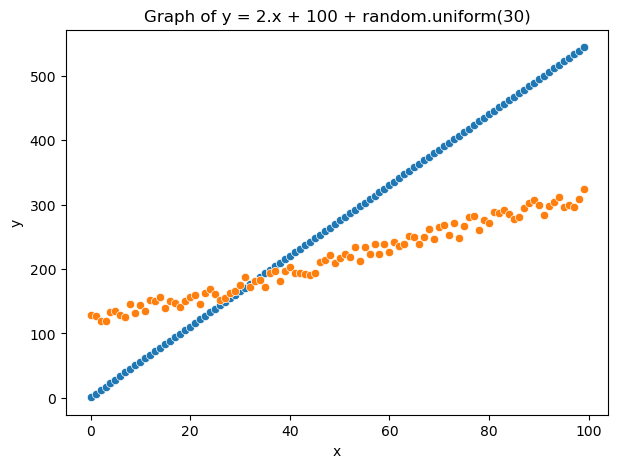

In [45]:
fig2 = plt.figure(figsize=(7, 5))
fig2 = sns.scatterplot(x = x[:,1], y=best_guess)
fig2 = sns.scatterplot(x = x[:,1], y=y)
fig2.set(xlabel ="x", ylabel = "y", title ='Graph of y = 2.x + 100 + random.uniform(30)')

cost =  168.26782405978847


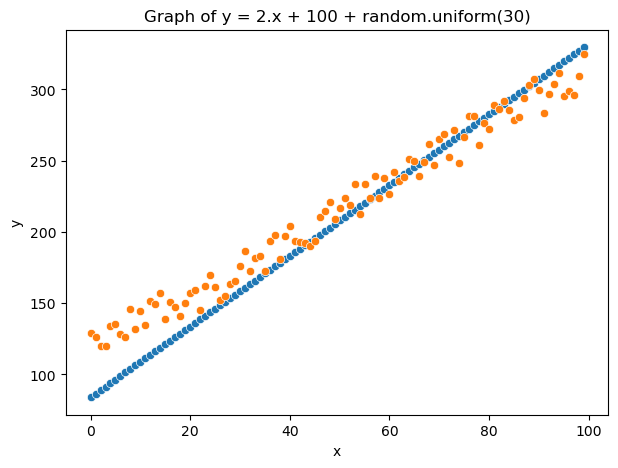

In [46]:
numIterations= 10000# The number of times we will loop around looking for a better s
for i in range(0, numIterations):
    best_guess = np.dot(theta, x.T) 
    loss = best_guess - y
    cost = np.sum(loss ** 2) / (2 * m) 
    gradient = np.dot(x.T, loss) / m 
    theta = theta - alpha * gradient

fig2 = plt.figure(figsize=(7, 5))
fig2 = sns.scatterplot(x = x[:,1], y=best_guess)
fig2 = sns.scatterplot(x = x[:,1], y=y)
fig2.set(xlabel ="x", ylabel = "y", title ='Graph of y = 2.x + 100 + random.uniform(30)') 
print ("cost = ", cost)

In [47]:
theta

array([84.01716375,  2.48047525])

In [48]:
def gradientDescent(x, y, theta, alpha, numIterations): 
    # Check x and y shape
    x_length, x_width = np.shape(x)
    if (x_length != y.size):
        raise Exception("Error in gradientDescent : Length of x and y data inputs are different")
    else:
        m = x_length
    if (x_width < 2):
        raise Exception("Error: x data must contain at least two columns with x=[0,n] = 1")
    # Compute the best fit
    for i in range(0, numIterations): 
        best_guess = np.dot(x, theta) 
        loss = best_guess - y
        cost = np.sum(loss ** 2) / (2 * m) 
        gradient = np.dot(x.T, loss) / m 
        theta = theta - alpha * gradient
    return theta

In [49]:
x, y = genData(numPoints = 100, A = 2, K = 100, variance = 30) 
theta = np.ones(n)
print(n)

2


In [50]:
theta = gradientDescent(x, y, theta, alpha=0.0005, numIterations = 10000) 
theta

array([83.88806994,  2.48856282])

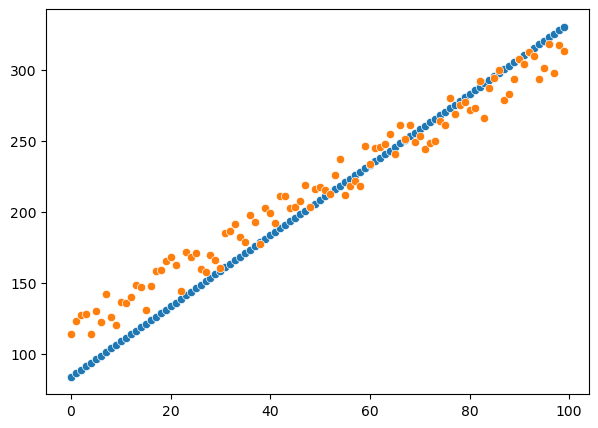

In [51]:
best_guess = np.dot(theta, x.T)
fig = plt.figure(figsize=(7, 5))
fig = sns.scatterplot(x = x[:,1], y=best_guess) 
fig = sns.scatterplot(x = x[:,1], y=y)

In [52]:
def genDataM(numPoints, numDimensions, x_upper, thetas, variance): 
    x = np.random.rand(numPoints, numDimensions)
    y = np.zeros(shape=numPoints)
    for i in range(0, numPoints):
        x[i][0] = 1
        y[i] = 0
        for j in range(0,len(thetas)):
            y[i] += x[i,j] * thetas[j]
        y[i] += random.uniform(0, 1) * variance
    return x, y
# Step 1
n = 3 # number of dimensions
x,y = genDataM(numPoints= 500, numDimensions = n, x_upper = 100, thetas=[1,5,3], variance = 5) 
theta = np.ones(n) # re-set the model paramters
x[0:5]

array([[1.        , 0.89755226, 0.66233272],
       [1.        , 0.73779139, 0.93845441],
       [1.        , 0.80792292, 0.19320175],
       [1.        , 0.25840689, 0.51959719],
       [1.        , 0.01386484, 0.6592552 ]])

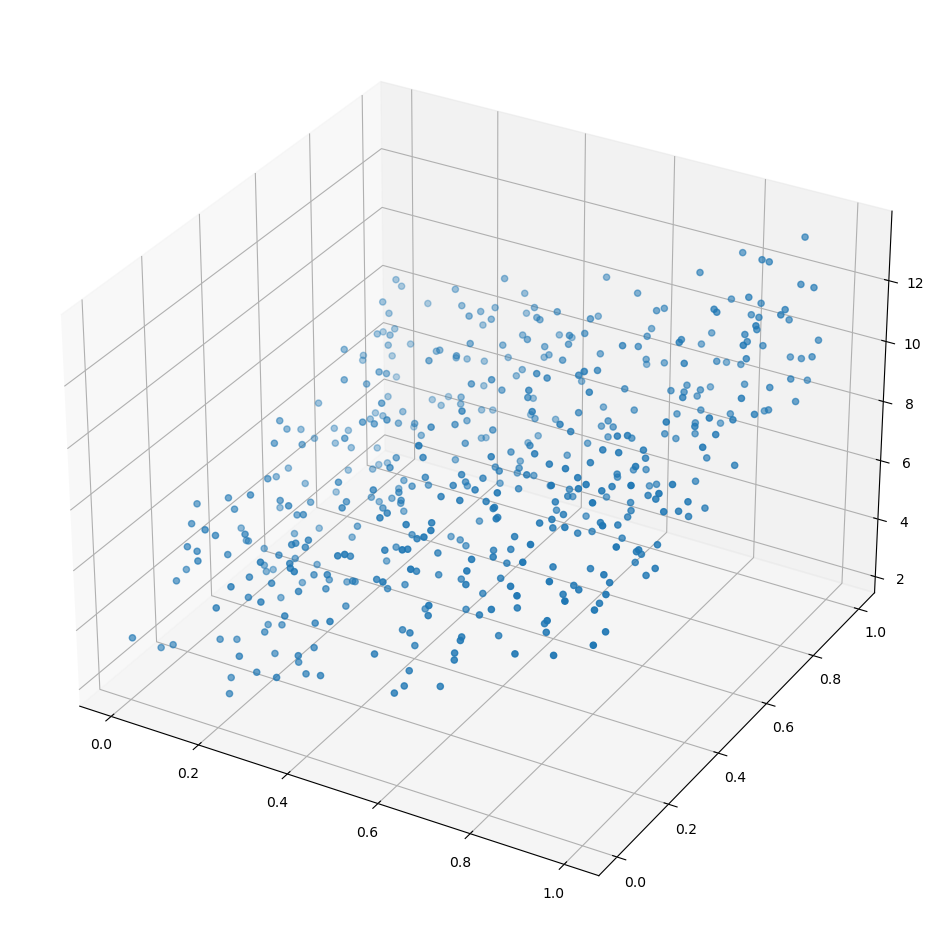

In [53]:
# Step 2
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
%matplotlib inline
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(x[:,1],x[:,2],y)

In [54]:
# Step 3
theta = gradientDescent(x, y, theta, alpha=0.0005, numIterations = 50000) 
theta

array([3.82671046, 4.63643609, 2.85390532])

In [56]:
# Step 4
best_guess = np.dot(theta, x.T) 
ax.scatter(x[:,1],x[:,2],best_guess)